# Barlow's equation in conjungtion with the KAPA methods.

The Barlow's equation is used for the compute the internal yield pressure in a tubular-thinned wall cylinder. 

## Barlow as a thick wall hoop stress

Barlow's equation:
$$ p_b = 2\frac{\sigma_y t}{D_0}$$
dada

In [1]:
#Importing some modules that will be used later
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

### Case of study

For the sake of have a better understanding, lets consider the following crack profile on a 30" diameter pipe with a wall thickness of 0.375". Also, for the pipe let us consider a SMYS of 60100 psi and a design factor of 0.72 for a MOP of 1503 psi. For this case, we'are going to assume a upper Charpy V-notch (CVN) of 25 ft-lb. 

(0.0, 0.375)

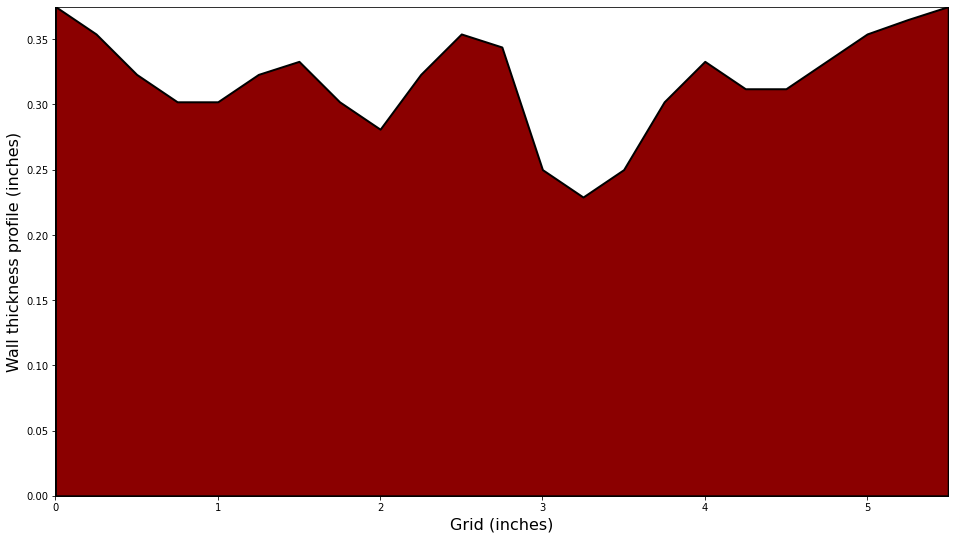

In [2]:
# Importing some crack profile
cprof = pd.read_excel('test_case.xlsx')

# Plotting the crack profile
fig, axs = plt.subplots(figsize=(16,9))

thickness = 0.375

axs.fill_between(cprof['profile_spacing'],thickness - cprof['depth'], 0, linewidth=2, color='darkred', ec='black')

axs.set_xlabel('Grid (inches)', size=16)
axs.set_ylabel('Wall thickness profile (inches)', size=16)

axs.set_xlim(min(cprof['profile_spacing']), max(cprof['profile_spacing']))
axs.set_ylim(0, thickness)

## KAPA for a crack-like defect.

The failure stress (in psi) computed through the KAPA method, is given by the following equation:

$$ 3\dfrac{\pi \epsilon (C_v/A_v)}{{\bar\sigma}^2L} = \ln\left[\sec\left( \dfrac{\pi}{2}\dfrac{M_p\sigma_p}{\bar\sigma}\right) \right] $$

Where $C_v$ is the upper shelf Charpy V-notch impact energy (ft-lb) and $A_v$ is the area expressed in square inches. $\epsilon$ is the elastic modulus (psi). $\bar \sigma$ flow stress (SMYS + 10 000 psi) (psi) and $\sigma_p$ is the failure stress (psi). With $M_p$ is given by

$$ M_p = \dfrac{1-\frac{A}{A_0}M_T^{-1}}{1-\frac{A}{A_0}} $$ 

$M_T$ si given by:

$$ M_T = \begin{cases} 
\sqrt{1 + 0.62756 \frac{L^2}{Dt} - 0.003375 \left(\frac{L^2}{Dt}\right)^2} & \text{if} &L \leq \sqrt{50 Dt} \\ 
0.032 \frac{L^2}{Dt} + 3.3 & \text{if} &L>\sqrt{50 Dt} 
\end{cases} $$